# Lab 07

This week, we'll learn a number of smaller skills:

1. Getting Extracted Feature Files
2. The Scipy Stack
3. Pandas: Combining DataFrames
4. Classification with Scikit Learn

## Getting Extracted Features Files

As we learned in the datasets class, there are 14 million books in the Hathitrust Extracted Features Dataset.

To download the EF dataset file for a book, you need its HathiTrust ID. You can see this in the URL when you find books in the HathiTrust; e.g. for the Tom Sawyer book at https://babel.hathitrust.org/cgi/pt?id=nyp.33433042068894, the id is nyp.33433042068894.

With the ID you can download the file at the following URL:

   > `https://bedrock.resnet.cms.waikato.ac.nz/vol-checker/VolumeCheck?download-id={{VOLUME ID}}`

For example:

   > https://bedrock.resnet.cms.waikato.ac.nz/vol-checker/VolumeCheck?download-id=nyp.33433042068894

Two things that we aren't focusing on, but which you can explore if you want large numbers of files for your final projects:
- There are many ways to programmatically choose _many_ books at once, rather than looking up the books in the online interface. The easiest is to download the bibliographic metadata (called [Hathifile](https://www.hathitrust.org/hathifiles). This is a CSV file of all the available books. 
- The main way to download files or lists of files is using a command line application called `rsync`, after converting the IDs to a file path. The reference for doing so is here: [Syncing a list of files](https://github.com/htrc/htrc-feature-reader/blob/master/examples/ID_to_Rsync_Link.ipynb).

## The Scipy Stack

You guys are becoming Pandas pros! Pandas is the foundation of much data science work by professionals today. As we continue, increasingly we'll be learning Pandas-specific code and conventions rather than all of Python.

Pandas is part of what is called the SciPy Stack: a selection of scientific tools that all work together. Here are the other ones:

 - **Numpy**: A mathematical library, offering ways to represent multidimensional arrays.
 - **Scipy**: Foundational scientific code.
 - **Pandas**: A nicer way of structuring and working with data, through DataFrame and Series objects. You can think of Pandas as a more flexible version of Numpy's arrays, where you can name the columns and work with the data with more semantics.
 - **Matplotlib**: A visualization library. We've seen this!
 - **IPython**: This is the special interactive version of Python that you use in Jupyter! So you don't have to write a script, run it, edit it, run it again, and so on.
 
There are many tools that run very well with the SciPy stack and round out our data science environment:

- **Scikit Learn**: Where Scipy is foundation tools, Scikit Learn gives you many advanced scientific algorithms for data science. Great documentation too: next week's clustering reading is from their documentation.
- **Jupyter**: The web browser notebook-style way of using IPython.
- **Seaborn**: Higher-level visualization tools. Matplotlib is like buying IKEA furniture: some assembly required. Seaborn is like buying pre-assembled furniture: much easier! Plus, just importing Seaborn into your code makes your Matplotlib code look nicer!
- **Statmodels**: Similar to Scipy, statsmodels offers additional statistics models and tools.

There are a few benefits due to how standard these tools are. First, they tend to play nice together. If you move into advanced libraries for really large scale analysis, those libraries tend to have the SciPy stack in mind too. Finally, they were installed by default when you installed Anaconda in the first week, so you have them!

## Pandas: Combining DataFrames

To combine multiple DataFrames, you can use `pd.concat()` on a list of DataFrames (i.e. [dataframe1, dataframe2, etc.] ). For example:

In [ ]:
import pandas as pd
test = pd.DataFrame([(1,'a'), (2,'b')])
test

,0,1
0,1,a
1,2,b


In [ ]:
# combining two of the same dataframe:
list_of_dataframes = [test, test]
combined = pd.concat(list_of_dataframes)
combined

,0,1
0,1,a
1,2,b
0,1,a
1,2,b


# Naive Bayes Classification with Scikit Learn

I've prepared a set of training documents and testing documents for a French/English classifier in [english_french_class.csv](https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/classification/english_french_class.csv).

Load a CSV to a dataframe as follows:

In [ ]:
url = 'https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/classification/english_french_class.csv'
data = pd.read_csv(url, encoding='utf-8').set_index('book')
data.head(2)

,!,!—,!—the,"""","""""","""because","""if","""it","""only","""or",...,ﬂight,ﬂights,ﬂoor,ﬂown,ﬂuid,ﬂung,ﬂush,ﬂushed,ﬂy,ﬂying
book,,,,,,,,,,,,,,,,,,,,,
hvd.32044014292023,868.0,0.0,0.0,4582.0,2.0,6.0,10.0,22.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hvd.32044102860673,1354.0,0.0,0.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This loaded a 'wide' DataFrame, where each row is a book, each column is a word, and the cell $value_{row, column}$ is the count for that $word_{column}$ in $book_{row}$. The book ids were also a column, but we converted those to an index after loading with `set_index('book')`. I'll detail later how this information was collected.

There is also a CSV with the [truth labels](https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/classification/english_french_class_labels.csv) for each book:

In [ ]:
url = 'https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/classification/english_french_class_labels.csv'
labels = pd.read_csv(url, encoding='utf-8')
labels.head(2)

,book,title,language
0,hvd.32044014292023,"Alice's adventures in Wonderland ; and, Throug...",eng
1,hvd.32044102860673,"Notre Dame de Paris. Abridged and edited, with...",fre


For train/test, we'll use half of the documents to build a classifier and the other half to test it.

(`iloc` allows you to slice dataframes by number; e.g. `iloc[0:6]`.)

In [ ]:
train_data = data.iloc[0:6]
train_labels = labels.iloc[0:6]

test_data = data.iloc[6:]
test_labels = labels.iloc[6:]

Naive Bayes classification is straightforward to use with Scikit Learn. To train, you need data and the correct classes:

```python 
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(training_data, training_labels)
```

To predict the class for unknown books, format their word frequencies in the same order and pass the information to the classifier:

```python
classifier.predict(new_data)
```

Lets try it for real:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

# Train our model!
classifier.fit(train_data, train_labels['language'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

And now load a new set of books and predict them. The books of the test dataset are:

1. Les caves du Vatican
2. Madame Bovary
3. Jean Barois
4. Catch-22
5. The Catcher in the Rye
6. The Lord of the Rings

Let's predict their languages:

In [ ]:
# Predict the language of another book
classifier.predict(test_data)

array(['fre', 'fre', 'fre', 'eng', 'eng', 'eng'], 
      dtype='<U3')

Perfect classification!

For most classification tasks, the accuracy is lower. Languages are very distinct, however. You can see the underlying information from the classifier with `classifier.predict_log_proba(test_data)`: zero shows the chosen class and the closer to zero the other values are, the closer their class probability was to the one that was eventually selected.

These books are 'test' documents because we know the real answer. The true labels can be given to `classifier.score`, to count what proportion of classifications are correct.

In [ ]:
classifier.score(test_data.values, test_labels['language'])

1.0

There isn't much complexity to this code. The tricky parts are in getting the data structured properly. Scikit Learn doesn't keep the column names from Pandas, it just pulls out the values. So if your training data looks like:

```document 1: [word X count, word Y count, ... word Z]
document 2: [word X count, word Y count, ... word Z]```

Then you need to make sure that your future documents order their counts as X, Y, ... Z.

To better see the information Scikit Learn is using, consider this test DataFrame:

In [ ]:
test_df = pd.DataFrame([[1,2,3], [4,5,6]], columns=['A', 'B', 'C'], index=['i', 'ii'])
test_df

,A,B,C
i,1,2,3
ii,4,5,6


This is the information that the classifier actually uses:

In [ ]:
test_df.values

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

It looks like a list of lists, doesn't it? It's a Numpy array, which for now you can think as a smarter, faster version of a list of lists. What matters is remembering that it is just numbers arranged in two dimensions, so don't expect the classifier to know what word each number refers to.

The truth labels are just one dimension:

In [ ]:
test_labels['language'].values

array(['fre', 'fre', 'fre', 'eng', 'eng', 'eng'], dtype=object)

# Questions

Load the following data:

In [ ]:
path = 'https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/contemporary_books/'
data = pd.read_csv(path + 'contemporary.csv', encoding='utf-8').set_index('book')
labels = pd.read_csv(path + 'contemporary_labels.csv', encoding='utf-8')

You'll be building a classifier for author.

**Q1**: What are the 3 classes?

**Q2**: Show the code to split the data and truth labels into a test and train dataset, using the first fifteen books for training.

**Q3**: Create and train a Multinomial Naive Bayes classifier. Paste your code.

**Q4**: What are the classifier's predictions on the test code? Fill in the numbered values below:

```
array(['Grisham', '[[1]]', 'Atwood', 'King', 'Grisham', '[[2]]', 'King',
       'Grisham', 'King', '[[3]]', 'Atwood', 'Atwood', 'Grisham', 'King',
       '[[4]]', 'King'], 
```

**Q5**: What is the classifier's accuracy to four decimal places? i.e. X.XXXX

**Q6**: Which books were classified correctly or incorrectly:

- Cell by Stephen King: [Correct, Incorrect]
- The Handmaid's Tale by Margaret Atwood: [Correct, Incorrect]
- Danse macabre by Stephen King: [Correct, Incorrect]
- Cat's eye by Margaret Atwood: [Correct, Incorrect]

_Make sure you're getting the correct answer before continuing._

**Q7**: Build a classification report with SciKit Learn as [shown here](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#evaluation-of-the-performance-on-the-test-set). The 'names' of classes are in `classified.classes_`. Fill in the missing precision and recall values below:

```
             precision    recall    f1-score   support

     Atwood       [[1]]     1.00       0.91         5
    Grisham       1.00      [[2]]      1.00         5
       King       1.00      0.83       0.91         6

avg / total       0.95      [[3]]      0.94        16
```

**Q8**: Try to train a new classifier, without smoothing. In other words, set classifier.alpha to 0 before training. What happens to the predictions and what do the underlying probability patterns point to as the reason?

**Q9**: [2 marks] [This printing of Sense and Sensibility](https://catalog.hathitrust.org/Record/008663968) has two volumes. I'm interested in looking at word patterns for the combined set of volumes all at once. How would you download the Extracted Features files for both volumes, and what code would you use to read and join the token count DataFrames into one long DataFrame?

## Extra Notes

I mentioned that even importing Seaborn makes your matplotlib graphics prettier. Here's an example:

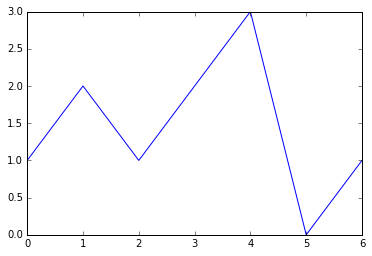

In [ ]:
%matplotlib inline
made_up_data = pd.Series([1,2,1,2,3,0,1])
made_up_data.plot()

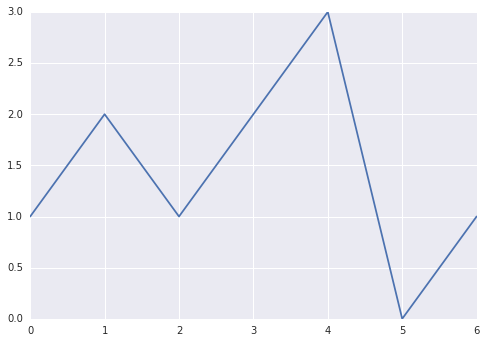

In [ ]:
import seaborn
made_up_data.plot()